<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Wiesenberg_LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

#warmup

In [0]:
import pandas as pd

# Data Frame to practice .loc[] techniques on
df = pd.DataFrame({'index':[1, 2, 3, 4, 5],
                   'name_1':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_2':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_3':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_4':['entry1', 'entry2', 'entry3', 'entry4', 'entry5'],
                   'name_5':['entry1', 'entry2', 'entry3', 'entry4', 'entry5']})

# Set Index
df.set_index('index', inplace=True)

print(df)

       name_1  name_2  name_3  name_4  name_5
index                                        
1      entry1  entry1  entry1  entry1  entry1
2      entry2  entry2  entry2  entry2  entry2
3      entry3  entry3  entry3  entry3  entry3
4      entry4  entry4  entry4  entry4  entry4
5      entry5  entry5  entry5  entry5  entry5


In [0]:
### Select by a Single Label
#1 Select and print the '1' Row
df.iloc[0]


name_1    entry1
name_2    entry1
name_3    entry1
name_4    entry1
name_5    entry1
Name: 1, dtype: object

In [0]:
#2 Select and print Row 1 Label with Column 1 Label to get entry1
df.iloc[0, 0]

'entry1'

In [0]:
### Select Multiple Rows Using LISTS
#1 Select and print Row Labels 1, 2
df.iloc[:2].index

Int64Index([1, 2], dtype='int64', name='index')

In [0]:
#2 Select and print Row Labels 1, 3, 5
df.iloc[0:6:2].index

Int64Index([1, 3, 5], dtype='int64', name='index')

In [0]:
# Now Rows WITH desired Columns
#3 Select and print Row Labels 1, 2, 3 with Column Labels 'name_1', 'name_2', 'name_3'
df.iloc[0:6:2, 0:3]

,name_1,name_2,name_3
index,,,
1,entry1,entry1,entry1
3,entry3,entry3,entry3
5,entry5,entry5,entry5


In [0]:
#4 Select and print Row Labels 1, 3, 4, 5 with Column Labels 'name_1', 'name_3', 'name_4', 'name_5'
df.drop([2]).drop('name_2', axis=1)

,name_1,name_3,name_4,name_5
index,,,,
1,entry1,entry1,entry1,entry1
3,entry3,entry3,entry3,entry3
4,entry4,entry4,entry4,entry4
5,entry5,entry5,entry5,entry5


# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

##Simple Web Scraper: IMDb

In [0]:
#get url
from requests import get
url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
response = get(url)
print(response.text[500])

In [0]:
#turn to soup
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(reponse.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [0]:
#extract left aligned div class
vote_container = html_soup.find_all('div', class_='leftAligned')
vote_container[1:11]

[<div class="leftAligned">10,342</div>,
 <div class="leftAligned">6,524</div>,
 <div class="leftAligned">11,859</div>,
 <div class="leftAligned">12,549</div>,
 <div class="leftAligned">6,731</div>,
 <div class="leftAligned">3,098</div>,
 <div class="leftAligned">1,435</div>,
 <div class="leftAligned">988</div>,
 <div class="leftAligned">752</div>,
 <div class="leftAligned">2,540</div>]

In [0]:

votes = [containers.text for containers in vote_container]
votes[1:11]

['10,342',
 '6,524',
 '11,859',
 '12,549',
 '6,731',
 '3,098',
 '1,435',
 '988',
 '752',
 '2,540']

In [0]:
list(map(int, votes[1:11]))

ValueError: ignored

In [0]:
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0323073/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams
votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
    
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['10,695', '6,858', '12,577', '13,414', '7,163', '3,298', '1,528', '1,029', '779', '2,624'], ['322', '195', '308', '218', '87', '32', '13', '6', '6', '16'], ['14,796', '11,769', '22,720', '20,300', '8,615', '3,343', '1,511', '915', '666', '2,395'], ['58,911', '61,229', '111,136', '61,573', '20,592', '7,057', '2,593', '1,199', '689', '1,249']]


In [0]:
import pandas as pd
movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']
df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df

,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,10695,322,14796,58911,10
1,6858,195,11769,61229,9
2,12577,308,22720,111136,8
3,13414,218,20300,61573,7
4,7163,87,8615,20592,6
5,3298,32,3343,7057,5
6,1528,13,1511,2593,4
7,1029,6,915,1199,3
8,779,6,666,689,2
9,2624,16,2395,1249,1


In [0]:
#convert to tidy
df_tidy= df.melt(id_vars='Star Rating')
df_tidy = df_tidy.rename(columns={'variable':'movie', 'value':'Number of Votes'})
df_tidy

,Star Rating,movie,Number of Votes
0,10,The Lion King (2019),10695
1,9,The Lion King (2019),6858
2,8,The Lion King (2019),12577
3,7,The Lion King (2019),13414
4,6,The Lion King (2019),7163
5,5,The Lion King (2019),3298
6,4,The Lion King (2019),1528
7,3,The Lion King (2019),1029
8,2,The Lion King (2019),779
9,1,The Lion King (2019),2624


In [0]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Star Rating        40 non-null int64
movie              40 non-null object
Number of Votes    40 non-null object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [0]:
#change number of votes from string to int
df_tidy['Number of Votes'] = pd.to_numeric(df_tidy['Number of Votes'])
df_tidy

,Star Rating,movie,Number of Votes
0,10,The Lion King (2019),10695
1,9,The Lion King (2019),6858
2,8,The Lion King (2019),12577
3,7,The Lion King (2019),13414
4,6,The Lion King (2019),7163
5,5,The Lion King (2019),3298
6,4,The Lion King (2019),1528
7,3,The Lion King (2019),1029
8,2,The Lion King (2019),779
9,1,The Lion King (2019),2624


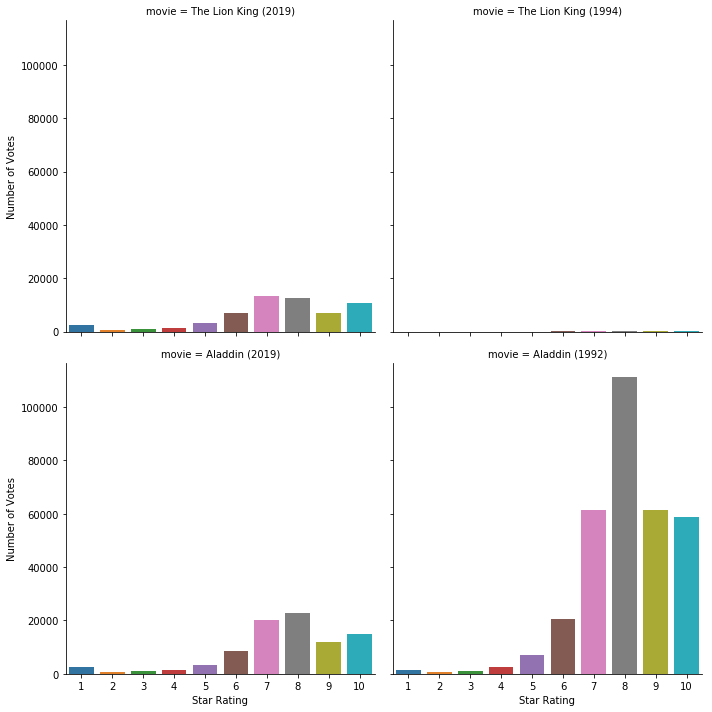

In [0]:
#categorical bar plot
import seaborn as sns
sns.catplot(x='Star Rating', y='Number of Votes', col='movie', kind='bar', data=df_tidy,
            col_wrap=2)

In [0]:
df_tidy['Vote Percent'] = df_tidy.groupby('movie')['Number of Votes'].apply(lambda x: x / x.sum() * 100)
df_tidy

,Star Rating,movie,Number of Votes,Vote Percent
0,10,The Lion King (2019),10695,17.835404
1,9,The Lion King (2019),6858,11.436671
2,8,The Lion King (2019),12577,20.973901
3,7,The Lion King (2019),13414,22.369716
4,6,The Lion King (2019),7163,11.945301
5,5,The Lion King (2019),3298,5.499875
6,4,The Lion King (2019),1528,2.548153
7,3,The Lion King (2019),1029,1.716001
8,2,The Lion King (2019),779,1.299091
9,1,The Lion King (2019),2624,4.375886


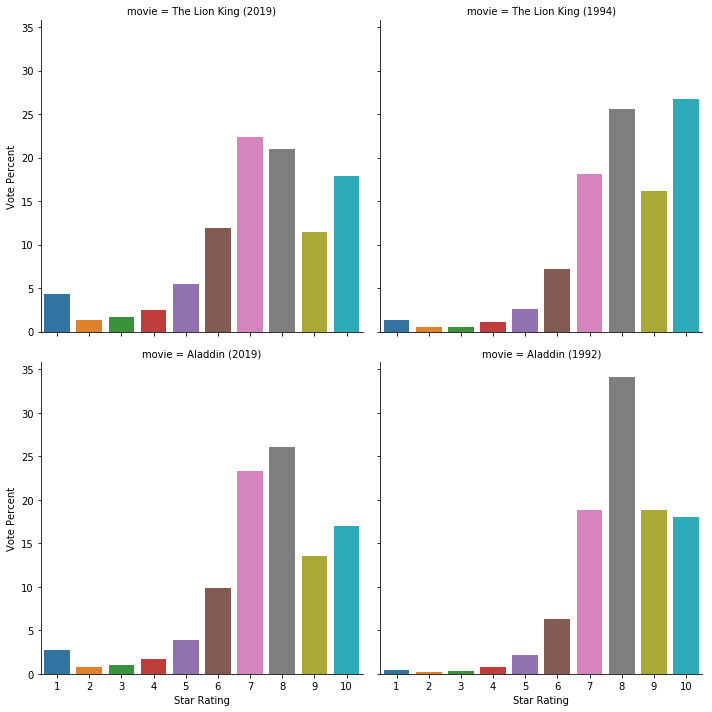

In [0]:
sns.catplot(x='Star Rating', y='Vote Percent', col='movie', kind='bar', col_wrap=2, data=df_tidy)

## Anatomy of a Matplotlib Plot

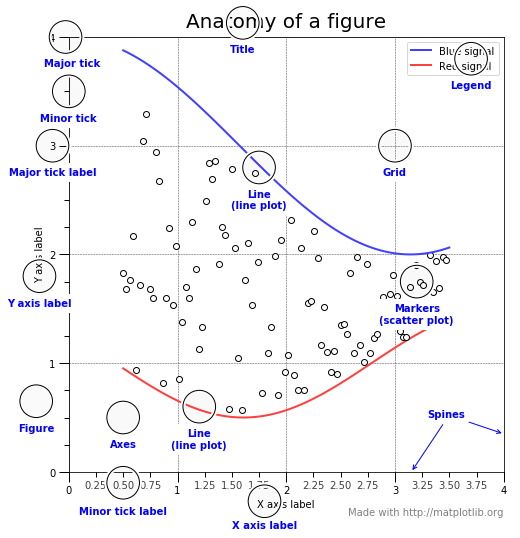

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

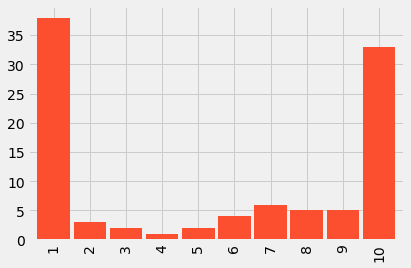

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

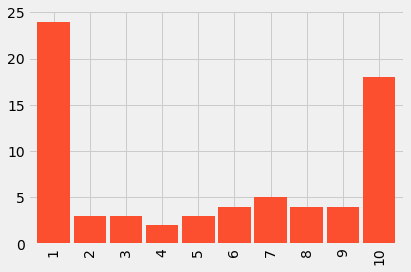

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

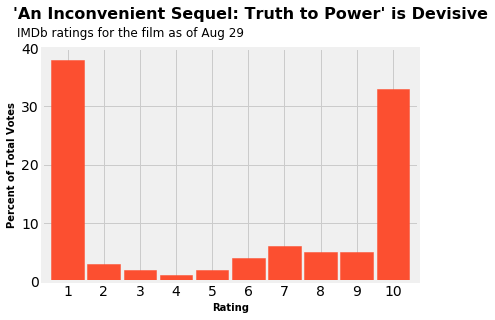

In [5]:
# use fivethirtyeight style guideline
plt.style.use('fivethirtyeight')
#white background
fig, ax = plt.subplots(facecolor='white')
#width and color of bars, plot bar graph
fake.plot.bar(Color = 'C1', width = 0.9)
import matplotlib.pyplot as pyplot
#labels
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.text(x=-1.5, y=45, fontweight='bold', fontsize=16, #text blocks are more versatile
         s ="'An Inconvenient Sequel: Truth to Power' is Devisive");
plt.text(x=-1.4, y=42, fontsize=12,
         s='IMDb ratings for the film as of Aug 29')
plt.yticks(range(0,41, 10))
plt.xticks(rotation=0);

## Reproduce with real data

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [12]:
#time stamp 
df['category'].value_counts()

Top 1000 voters       4216
Aged under 18         4216
Aged 45+              4216
Males Aged 45+        4216
Males under 18        4216
Males Aged 18-29      4216
Males                 4216
Non-US users          4216
IMDb users            4216
Females               4216
Aged 18-29            4216
IMDb staff            4216
US users              4216
Aged 30-44            4216
Females Aged 45+      4216
Males Aged 30-44      4216
Females Aged 18-29    4216
Females Aged 30-44    4216
Females under 18      4165
Name: category, dtype: int64

In [15]:
# we only want data on all IMDb users as of Aug 29
final = df[df['category'] == 'IMDb users'].tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [18]:
#python 2 technqiue to create a list of the columns we want to include
# a way to include only percent columns
columns = ['{}_pct'.format(i) for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [22]:
#same idea, but technique new to python 3
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [31]:
#isolating the columns we want using the column list
data = final[columns]
#transposing dataset to put percents in index
data = data.T
#setting index to regular integers 1-10
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


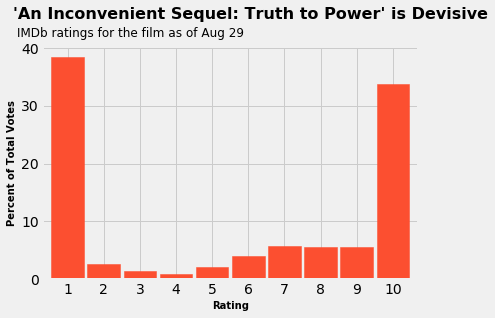

In [35]:
# use fivethirtyeight style guideline
plt.style.use('fivethirtyeight')
#white background
# fig, ax = plt.subplots(facecolor='white')
#width and color of bars, plot bar graph
data.plot.bar(Color = 'C1', width = 0.9, legend=False)
import matplotlib.pyplot as pyplot
#labels
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.text(x=-1.5, y=45, fontweight='bold', fontsize=16, #text blocks are more versatile
         s ="'An Inconvenient Sequel: Truth to Power' is Devisive");
plt.text(x=-1.4, y=42, fontsize=12,
         s='IMDb ratings for the film as of Aug 29')
plt.yticks(range(0,41, 10))
plt.xticks(rotation=0);

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [39]:
#import altair and dataset
import altair as alt
tg = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')
tg.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [0]:
#